# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Answer:**
<br>
<br>
This week, I am using a loan default prediction dataset from Kaggle (https://www.kaggle.com/datasets/marcbuji/loan-default-prediction).
<br>
<br>
**Who**
<br>
In the case of this dataset and its analysis, my audience and/or those who may be interested in this data are financial institutions and financial organizations. More specifically, risk analysts and/or actuaries would be interested in the insights from this data.
<br>
<br>
**What**
<br>
The audience should understand where/how this data was obtained and the findings that are relevant to them once an analysis is performed. Additionally, one should ask additional clarifying questions to further the analysis and produce the action that keeps the audience engaged and invested in your data/analysis.
<br>
<br>
**How**
<br>
For a a live presentation, there is more ability to have questions and natural conversation built into the findings. However, if they must be summarized, choosing the strongest and/or most relevant findings is best. Additionally, the organization/method by which one presents this information in a written document or communication is very important.

# 3. Homework - work with your own data

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [63]:
df_loan = pd.read_csv("Loan_Default_Data_Train.csv")

In [64]:
df_loan.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.00,3 years,31216.05,debt consolidation,I,0.00,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.00,5 years,11660.49,debt consolidation,I,0.00,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.00,5 years,5637.87,major purchase,I,0.00,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.00,3 years,15607.17,major purchase,I,0.00,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.00,5 years,27472.86,debt consolidation,I,0.00,0


In [65]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        81925 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt_to_Income       84011 non-null  float64
 11  Postal_Code          86111 non-null  float64
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usage_Rate           87500 non-null 

In [66]:
df_loan.describe()

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
count,87500.00,87500.00,81925.00,87500.00,87500.00,84011.00,86111.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,83314.00,82648.00,87500.00,87500.00
mean,83946.25,3798914.12,134859.63,0.33,0.01,30.94,51155.39,25920.54,0.20,16.52,95.52,0.67,236389.46,39.46,22.02,12.78,53268.64,29556.49,0.32,0.19
std,36100.10,2289038.08,98824.73,0.88,0.08,14.08,31211.23,14433.84,0.65,4.90,40.55,0.96,255056.78,391.92,6.45,5.37,53255.51,37456.25,3.55,0.39
min,21560.00,24847.00,8800.00,0.00,0.00,0.00,1000.00,1710.00,0.00,8.00,0.00,0.00,0.00,0.00,11.00,2.00,332.00,0.00,0.00,0.00
25%,52616.75,1483874.25,83246.59,0.00,0.00,20.43,22900.00,15048.00,0.00,12.31,66.05,0.00,51734.93,0.00,17.00,9.00,23240.00,11446.74,0.00,0.00
50%,83900.00,4132010.50,114400.00,0.00,0.00,30.14,47700.00,23940.00,0.00,16.49,97.01,0.00,138806.23,0.00,21.00,12.00,39674.00,20892.78,0.00,0.00
75%,115261.25,5952908.75,160160.00,0.00,0.00,40.91,80200.00,34200.00,0.00,20.77,126.59,1.00,353475.54,0.00,26.00,16.00,66400.00,36449.08,0.00,0.00
max,146559.00,7351847.00,8264030.72,18.00,6.00,639.29,99900.00,59850.00,86.00,25.00,1534.76,8.00,5629234.33,26308.47,45.00,83.00,1710630.00,1338777.81,169.05,1.00


In [67]:
# Changing to more appropriate data types for the Postal_Code and Asst_Reg fields
# Do not want to drop records without a Postal_Code, so must use the Int64 data type as it supports nullable values
df_loan["Postal_Code"] = df_loan["Postal_Code"].astype("Int64")

# The Asst_Reg field may be more appropriate as a float value for future calculations
df_loan["Asst_Reg"] = df_loan["Asst_Reg"].astype(float)

In [68]:
# Confirming data type changes for the Postal_Code and Asst_Reg fields
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  float64
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        81925 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt_to_Income       84011 non-null  float64
 11  Postal_Code          86111 non-null  Int64  
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usage_Rate           87500 non-null 

In [69]:
# Identifying duplicated rows - found no duplicated records
duplicate_rows = df_loan[df_loan.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [ID, Asst_Reg, GGGrade, Experience, Validation, Yearly_Income, Home_Status, Unpaid_2_years, Already_Defaulted, Designation, Debt_to_Income, Postal_Code, Lend_Amount, Deprecatory_Records, Interest_Charged, Usage_Rate, Inquiries, Present_Balance, Gross_Collection, Sub_GGGrade, File_Status, State, Account_Open, Total_Unpaid_CL, Duration, Unpaid_Amount, Reason, Claim_Type, Due_Fee, Default]
Index: []

[0 rows x 30 columns]


In [70]:
# Dropping numeric columns that shouldn't be calculated when computing mean, median, mode
df_loan_trunc = df_loan.drop(["ID", "Postal_Code"], axis=1)

In [71]:
# Setting format globally so mean, median, mode calculations are more readable (not in scientific notation)
pd.set_option('display.float_format', '{:.2f}'.format)

In [72]:
# Calculating the mean for each relevant numeric field
df_loan_trunc.mean(numeric_only=True)

Asst_Reg              3798914.12
Yearly_Income          134859.63
Unpaid_2_years              0.33
Already_Defaulted           0.01
Debt_to_Income             30.94
Lend_Amount             25920.54
Deprecatory_Records         0.20
Interest_Charged           16.52
Usage_Rate                 95.52
Inquiries                   0.67
Present_Balance        236389.46
Gross_Collection           39.46
Sub_GGGrade                22.02
Account_Open               12.78
Total_Unpaid_CL         53268.64
Unpaid_Amount           29556.49
Due_Fee                     0.32
Default                     0.19
dtype: float64

In [73]:
# Calculating the median for each relevant numeric field
df_loan_trunc.median(numeric_only=True)

Asst_Reg              4132010.50
Yearly_Income          114400.00
Unpaid_2_years              0.00
Already_Defaulted           0.00
Debt_to_Income             30.14
Lend_Amount             23940.00
Deprecatory_Records         0.00
Interest_Charged           16.49
Usage_Rate                 97.01
Inquiries                   0.00
Present_Balance        138806.23
Gross_Collection            0.00
Sub_GGGrade                21.00
Account_Open               12.00
Total_Unpaid_CL         39674.00
Unpaid_Amount           20892.78
Due_Fee                     0.00
Default                     0.00
dtype: float64

In [74]:
# Finding the mode for the dataset
df_loan_trunc.mode(numeric_only=True)

,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
0,184784.00,105600.00,0.00,0.00,22.98,17100.00,0.00,14.56,0.00,0.00,0.00,0.00,19.00,11.00,24070.00,0.00,0.00,0.00
1,196745.00,NaN,NaN,NaN,28.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,199810.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,227758.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,386104.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,7113773.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,7118603.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,7127909.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,7133024.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Identifying records/rows with at least one NULL/NaN value
df_loan[df_loan.isna().any(axis=1)]

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
7,94448,1468916.00,III,4yrs,Source Verified,NaN,RENT,2,0,General manager,...,fully paid,CT,26,123338.00,3 years,17496.72,debt consolidation,I,0.00,0
8,109853,7067902.00,VII,<1yr,Vfied,NaN,RENT,0,0,laborer,...,whole,California,6,19256.00,5 years,225.72,other,I,0.00,0
9,138407,2704860.00,II,2yrs,Not Vfied,149600.00,OWN,0,0,truck driver,...,whole,TX,10,18592.00,3 years,NaN,other,I,0.00,0
12,58608,372846.00,III,>10yrs,Vfied,144320.00,MORTGAGE,0,0,"Catering At Its Best, Inc.",...,fully paid,OR,11,86486.00,3 years,56985.75,debt consolidation,I,0.00,1
15,76507,874224.00,I,>10yrs,Not Vfied,91520.00,RENT,0,0,Master Concepts,...,whole,Newyork,7,24568.00,3 years,10593.45,debt consolidation,I,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87483,143101,3878048.00,V,8yrs,Source Verified,130240.00,MORTGAGE,0,0,Truck Driver,...,whole,GA,15,44986.00,5 years,NaN,home improvement,I,0.00,0
87490,93393,859824.00,II,1yrs,Source Verified,112640.00,MORTGAGE,0,0,NaN,...,whole,Florida,12,17928.00,3 years,16829.82,debt consolidation,I,0.00,0
87492,66652,7073160.00,II,>10yrs,Not Vfied,NaN,RENT,0,0,Pastor,...,whole,IL,5,26892.00,3 years,26516.97,credit card,I,0.00,0
87493,136044,5884961.00,I,9yrs,Source Verified,392480.00,OWN,0,0,Attorney,...,whole,California,23,NaN,3 years,5666.94,debt consolidation,I,0.00,0


In [76]:
# Removing records/rows that have at least 1 NULL/NaN value
# Choose removal of these records to work with a more comprehensive, less manipulated dataset
# There is still a good amount of records remaining
df_loan_nonnulls = df_loan.dropna()
df_loan_nonnulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68505 entries, 0 to 87498
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   68505 non-null  int64  
 1   Asst_Reg             68505 non-null  float64
 2   GGGrade              68505 non-null  object 
 3   Experience           68505 non-null  object 
 4   Validation           68505 non-null  object 
 5   Yearly_Income        68505 non-null  float64
 6   Home_Status          68505 non-null  object 
 7   Unpaid_2_years       68505 non-null  int64  
 8   Already_Defaulted    68505 non-null  int64  
 9   Designation          68505 non-null  object 
 10  Debt_to_Income       68505 non-null  float64
 11  Postal_Code          68505 non-null  Int64  
 12  Lend_Amount          68505 non-null  float64
 13  Deprecatory_Records  68505 non-null  int64  
 14  Interest_Charged     68505 non-null  float64
 15  Usage_Rate           68505 non-null  floa

In [77]:
# Checking class balance for the Validation field before one-hot encoding
df_loan_nonnulls["Validation"].value_counts(normalize=True)

Validation
Source Verified   0.39
Vfied             0.31
Not Vfied         0.30
Name: proportion, dtype: float64

In [78]:
# Checking class balance for the Home_Status field before one-hot encoding
df_loan_nonnulls["Home_Status"].value_counts(normalize=True)

Home_Status
MORTGAGE   0.51
RENT       0.40
OWN        0.10
OTHER      0.00
NONE       0.00
Name: proportion, dtype: float64

In [79]:
# Checking class balance for the File_Status field before one-hot encoding
df_loan_nonnulls["File_Status"].value_counts(normalize=True)

File_Status
whole        0.53
fully paid   0.47
Name: proportion, dtype: float64

In [80]:
# One-hot encoding the Validation, Home_Status, and File_Status fields
df_loan_nonnulls = pd.get_dummies(df_loan_nonnulls, columns=["Validation", "Home_Status", "File_Status"])

In [81]:
df_loan_nonnulls.head()

,ID,Asst_Reg,GGGrade,Experience,Yearly_Income,Unpaid_2_years,Already_Defaulted,Designation,Debt_to_Income,Postal_Code,...,Validation_Not Vfied,Validation_Source Verified,Validation_Vfied,Home_Status_MORTGAGE,Home_Status_NONE,Home_Status_OTHER,Home_Status_OWN,Home_Status_RENT,File_Status_fully paid,File_Status_whole
0,95074,421802.00,II,>10yrs,633600.00,0,0,GLENDALE NISSAN,12.55,91300,...,False,False,True,True,False,False,False,False,True,False
1,134131,3964312.00,IV,7yrs,85483.20,0,0,Business Teacher,9.00,27400,...,False,True,False,False,False,False,False,True,False,True
2,92602,4247560.00,III,<1yr,79200.00,0,0,driver,24.91,32800,...,False,True,False,False,False,False,False,True,False,True
3,22591,197179.00,III,<1yr,61600.00,0,0,AvePoint,16.58,7000,...,False,False,True,False,False,False,False,True,True,False
4,125060,4646684.00,V,2yrs,68053.92,0,0,Lead Tester,40.05,70800,...,False,True,False,False,False,False,False,True,True,False


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

**Answer:**
<br>
<br>
Yes, most of the data in this dataset is usable. It provides some great features for analysis and has a good number of records and columns.
<br>
<br>
I did have to modify/correct some of the data, such as removing records with nulls, converting to more appropriate data types, and using one-hot encoding for categorical columns. The df_loan_nonnulls dataframe can now serve as my processed dataset for analyses.
<br>
<br>
For most of the categorical fields, the classes are fairly balanced, with the exception of the Home_Status column where there is a bit more variation between the classes (see above).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [84]:
# Preprocessing the df_loan dataframe for use
df_loan.dropna()
df_loan["Postal_Code"] = df_loan["Postal_Code"].astype("Int64")
df_loan["Asst_Reg"] = df_loan["Asst_Reg"].astype(float)

In [ ]:
# Calculating the default rate by the Reason listed on the loan application
# Trying to identify which loan reasons have the highest rates of default
default_rate = df_loan.groupby("Reason")["Default"].mean().sort_values(ascending=False)

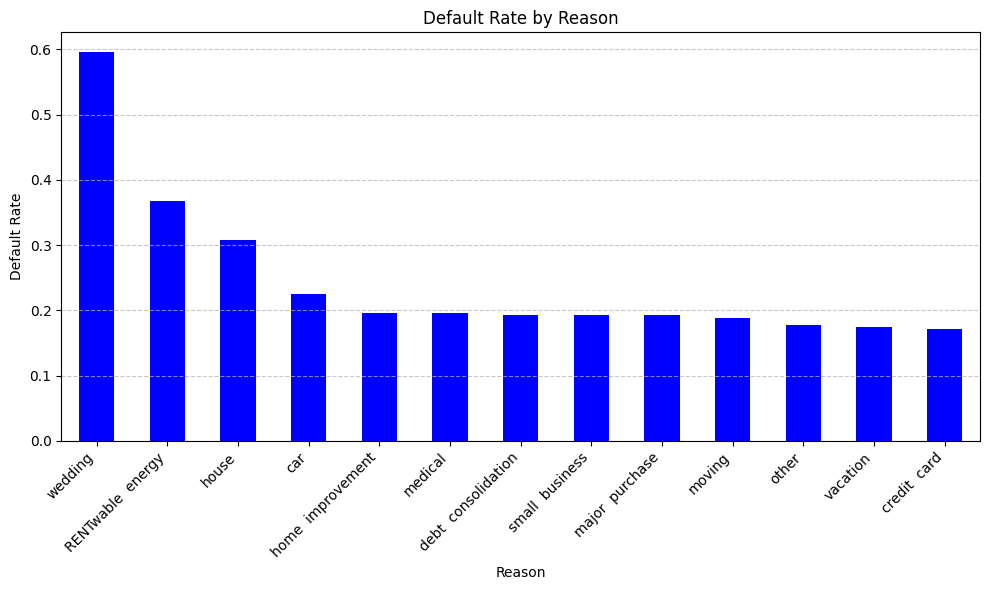

In [89]:
# Seeking to mimic the Ticket Trend chart on Page 4 
plt.figure(figsize=(10, 6))
default_rate.plot(kind="bar", color="blue")

plt.title("Default Rate by Reason")
plt.xlabel("Reason")
plt.ylabel("Default Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()